# Lecture 3 - Numpy, Pandas and Plotting
This lecture will cover some more advanced libraries in Python, which are used very commonly in data science.
## Numpy

Numpy is a **very** useful package that provides the following (and much more):
- A way to store, manipulate and process large multidimensional arrays efficiently
- A ton of mathematics operations

The main appeal of numpy is that its syntax is very similar to standard python lists, but it adds a ton more features that are particularly useful in data science, machine learning, mathematics, etc. 

The main element you will be using is the `np.array`

In [3]:
# Install packages
!pip install matplotlib pandas numpy seaborn

Defaulting to user installation because normal site-packages is not writeable
  Using cached matplotlib-3.8.2-cp312-cp312-win_amd64.whl.metadata (5.9 kB)
  Using cached pandas-2.2.0-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached contourpy-1.2.0-cp312-cp312-win_amd64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.47.2-cp312-cp312-win_amd64.whl.metadata (160 kB)
  Using cached kiwisolver-1.4.5-cp312-cp312-win_amd64.whl.metadata (6.5 kB)
  Using cached pillow-10.2.0-cp312-cp312-win_amd64.whl.metadata (9.9 kB)
  Using cached pyparsing-3.1.1-py3-none-any.whl.metadata (5.1 kB)
  Using cached tzdata-2023.4-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached matplotlib-3.8.2-cp312-cp312-win_amd64.whl (7.6 MB)
Using cached pandas-2.2.0-cp312-cp312-win_amd64.whl (11.5 MB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached contourpy-1.2.0-cp

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


### Imports

In order to use a package we must first 'import' it by using the syntax `import package`. For example to import `numpy` we use:

In [4]:
import numpy

However we often want to rename the package when using it so we use the syntax `import [package] as [name]`. For example the convention when importing numpy is to rename it `np` as follows:

In [5]:
# Import
import numpy as np

### Arrays

A numpy array is superficially similar to a Python list and you can index them in the same way

In [ ]:
my_list = [1, 2, 3, 4, 5]
my_np_arr = np.array(my_list)

print("List =", my_list)
print("Arr  =", my_np_arr)
# About the same

List = [1, 2, 3, 4, 5]
Arr  = [1 2 3 4 5]


In [ ]:
# You can also do the same things you can do with lists
print(my_np_arr[3: 5])

my_np_arr = np.insert(my_np_arr, 0, -1)

print(my_np_arr)


my_np_arr = np.append(my_np_arr, [10])

print(my_np_arr)

[4 5]
[-1  1  2  3  4  5]
[-1  1  2  3  4  5 10]


In [ ]:
# The really special things in numpy come from its multidimensional arrays and functions to deal with them

# First, a few ways to create np.arrays
random_array = np.random.rand(100, 20, 40, 3) # random array
zero_array = np.zeros((100, 20, 40, 3))       # array full of zeros
one_array = np.ones((100, 20, 40, 3))         # array full of ones

The `shape` of an array is very useful, it tells you how many dimensions an array has, and what the size is of each. For instance, a vector of length $n$ would have a shape of `(n, )` or `(n, 1)`. A matrix with `n` rows and `m` columns would have a shape of `(n, m)`.

In [ ]:
print(random_array.shape)

(100, 20, 40, 3)


#### Multidimensional indexing

You can also index all of the dimensions of an array.

In [ ]:
# Now, this array has 4 dimensions, and we can index each of these
# Each element in random_array is itself an array of shape (20, 40, 3)

print(random_array[0].shape)
print(random_array[0][0].shape)
print(random_array[0][0][0].shape)
print(random_array[0][0][0][0].shape)

(20, 40, 3)
(40, 3)
(3,)
()


In [ ]:
# You can also index all axes, or a subset thereof

print(random_array[0, 1, 2, 2])

0.7614141003922162


In [ ]:
# And each element can be a slice too, a ':' indicates to take the all of the dimension's elements

print(random_array[:3, 1:2, :, 2].shape)

(3, 1, 40)


In [ ]:
# A slightly more useful example.
np.random.seed(1) # Just me seeding this to be reproducible

# A 2D matrix of size 100x2. Let's interpret this as each row is one datapoint's value. The first 2 columns are the features and the final one is the label.
dataset = np.random.rand(100, 2)
dataset[:, -1] = dataset[:, -2] * 3 + np.random.randn(100)

# All of the data
X = dataset[:, :1] # X is the first column
Y = dataset[:, -1] # Y is the final column

In [ ]:

X_with_bias = np.concatenate([np.ones_like(X[:, ]), X], axis=-1) # add the bias column of ones, effectively x_0 = 1
assert X_with_bias.shape == (len(Y), 2)

# Now, we know that the normal equation of linear regression is (https://en.wikipedia.org/wiki/Linear_least_squares#Derivation_of_the_normal_equations):
# theta = (X^T X) ^ -1 * (X^T Y)


# We can do the same thing in numpy:
def get_normal_equation_solution(X, Y):
    x_transpose_x = X.T @ X # @ symbol does matrix multiplication. arr.T gives transpose
    # np.linalg.inv returns the inverse of a matrix.
    x_transpose_x_inv = np.linalg.inv(x_transpose_x)
    x_transpose_times_y = X.T @ Y
    theta = x_transpose_x_inv @ x_transpose_times_y
    return theta

weights_for_lin_reg = get_normal_equation_solution(X_with_bias, Y)

In [ ]:
weights_for_lin_reg

array([0.21581616, 2.73586028])

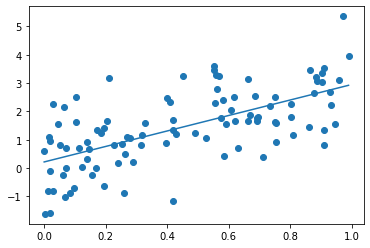

In [ ]:
# Just plotting this, will cover plotting itself in a second.
import matplotlib.pyplot as plt
x_linspace = np.linspace(np.min(X), np.max(X))
plt.scatter(X, Y)
plt.plot(x_linspace, x_linspace * weights_for_lin_reg[1] + weights_for_lin_reg[0])

### Operations

numpy also provides a ton of different operations, including basically everything that the math library does, and more.

In [11]:
np.random.seed(2)
arr = np.random.randn(200, 30, 40) # random normal data
print("np.sum(arr) = ", np.sum(arr))
print("np.prod(arr) =", np.prod(arr))
print("np.mean(arr) =", np.mean(arr))
print("np.std(arr) =", np.std(arr))
print("np.linalg.norm(arr) =", np.linalg.norm(arr))
print("np.max(arr) = ", np.max(arr))
print("np.min(arr) = ", np.min(arr))
print("arr.size = ", arr.size)

print("np.round(np.mean(arr), 3) =", np.round(np.mean(arr), 3))

np.sum(arr) =  -391.2395809257973
np.prod(arr) = -0.0
np.mean(arr) = -0.0016301649205241555
np.std(arr) = 0.9974962075841792
np.linalg.norm(arr) = 488.6719983586098
np.max(arr) =  4.730113812931079
np.min(arr) =  -4.9778644455537195
arr.size =  240000
np.round(np.mean(arr), 3) = -0.002


In [ ]:
# Most operations can also be called on the array itself, e.g.
print(np.min(arr), arr.min())

-4.9778644455537195 -4.9778644455537195


### Axis
We can also provide the `axis` argument to most of these operations to do something per `axis`. Now, an axis in numpy is effectively a dimension in an array. For example, in a 2D matrix, we have 2 axes, 0 and 1. 0 corresponds to the rows and 1 corresponds to the columns. This is extended for arrays with more dimensions too.

Now, when I use the `axis=xxx` argument to a numpy function, it effectively performs that only for that dimension, leaving the others intact. An example is useful here:

In [3]:
array = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
    [10, 11, 12],
])
print("shape = ", array.shape)

print("array.sum() =", array.sum())

print("array.sum(axis=0) = ", array.sum(axis=0)) # This effectively takes the sum across the rows

print("array.sum(axis=1) =", array.sum(axis=1)) # This effectively takes the sum across the columns

shape =  (4, 3)
array.sum() = 78
array.sum(axis=0) =  [22 26 30]
array.sum(axis=1) = [ 6 15 24 33]


### Advanced Slicing

Now, numpy also provides a way to slice, filter and select elements from an array that is quite useful.
Below are three examples.


Firstly, select the positive elements in an array

Secondly, sort student's names and marks.

Finally, create the following function:

$$
f(x) = 
    \begin{cases}
        log(x + 1) & \text{if } x > 0\\
        -log(-x + 1) & \text{if } x < 0
    \end{cases}
$$

In [4]:
# Simple example
a = np.array([1, 2, 3, -5, 4, -3])

print("a > 0 = ", a > 0)

print("a[a > 0] = ", a[a > 0]) # Select all the positive ones

a > 0 =  [ True  True  True False  True False]
a[a > 0] =  [1 2 3 4]


In [8]:
names = np.array(['John', 'Mary', 'Bob'])
marks = np.array([60, 100, 90])

print("np.argsort(marks) = ", np.argsort(marks)) # indices to sort


# We can select using this, and sort both arrays based on a common one
idx = np.argsort(marks)
print("Sorted Names = ", names[idx])
print("Sorted Marks = ", marks[idx])

np.argsort(marks) =  [0 2 1]
Sorted Names =  ['John' 'Bob' 'Mary']
Sorted Marks =  [ 60  90 100]


In [9]:
x = np.linspace(-1000, 1000, 100)
y = np.copy(x)
# Now, we can filter this
where_x_neg = x < 0
where_x_pos = x > 0

# Do the piecewise definition here
y[where_x_neg] = -np.log(-x[where_x_neg] + 1)
y[where_x_pos] = np.log(x[where_x_pos] + 1)

plt.plot(x, y) # Just to see if we got it right

NameError: name 'plt' is not defined

### Performance Considerations

Now, `numpy` is written mostly in `C`, and thus it is super fast. If you can do your operation using a numpy function instead of a python loop, you can often get an insane speedup.

In [ ]:
data = np.random.rand(4000, 4000)

In [ ]:
%%time
np.linalg.norm(data)

CPU times: user 42.6 ms, sys: 4.43 ms, total: 47 ms
Wall time: 12.6 ms


2309.648050430043

In [ ]:
%%time
ans = 0
for elem in data.flatten():
    ans += elem ** 2
np.sqrt(ans)

CPU times: user 8.82 s, sys: 50.2 ms, total: 8.87 s
Wall time: 8.8 s


2309.648050430194

So, using numpy took < 20 ms, while using a python loop took 5 seconds. That is a massive increase in speed. So, if something of yours is running slowly, I'd advise you to check if you can replace your loops with numpy operations. **Just make sure to check that the results are the same. Fast code is useless if it is wrong**

## Pandas, Seaborn & Visualisations

Now, other useful libraries that I will briefly cover here are:
- Pandas: Deal with data in `dataframes`, basically spreadsheet-style data
- Matplotlib and Seaborn: Allows you to basically plot everything you would want

### Pandas

In [13]:
import pandas as pd
import seaborn as sns

dataset = sns.load_dataset('iris') # Load a dataset to test things out

C:\Users\simon\AppData\Local\Temp\ipykernel_3048\4093237729.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [14]:
dataset.head() # Shows the top few rows, and columns

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [15]:
dataset.shape # 150 rows by 5 columns

(150, 5)

In [16]:
# Access a column by its name
dataset['sepal_length']

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64

In [17]:
# Access a column by its name
dataset['sepal_length'].to_numpy()

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

In [18]:
dataset.describe() # some useful stats for numerical columns

sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

In [19]:
# You can index a df as follows:
print(dataset.iloc[0, 0])
print(dataset.loc[0, 'sepal_length'])

5.1
5.1


In [20]:
# This is a useful, but potentially slow way of iterating through a DF
for row_index, tuple_of_values in enumerate(dataset.itertuples()):
    # Can use this as tuple_of_values.<column_name>
    print("Row ", row_index, "=", tuple_of_values, ". species =", tuple_of_values.species)
    
    if row_index > 10: break # just to not print too much

Row  0 = Pandas(Index=0, sepal_length=5.1, sepal_width=3.5, petal_length=1.4, petal_width=0.2, species='setosa') . species = setosa
Row  1 = Pandas(Index=1, sepal_length=4.9, sepal_width=3.0, petal_length=1.4, petal_width=0.2, species='setosa') . species = setosa
Row  2 = Pandas(Index=2, sepal_length=4.7, sepal_width=3.2, petal_length=1.3, petal_width=0.2, species='setosa') . species = setosa
Row  3 = Pandas(Index=3, sepal_length=4.6, sepal_width=3.1, petal_length=1.5, petal_width=0.2, species='setosa') . species = setosa
Row  4 = Pandas(Index=4, sepal_length=5.0, sepal_width=3.6, petal_length=1.4, petal_width=0.2, species='setosa') . species = setosa
Row  5 = Pandas(Index=5, sepal_length=5.4, sepal_width=3.9, petal_length=1.7, petal_width=0.4, species='setosa') . species = setosa
Row  6 = Pandas(Index=6, sepal_length=4.6, sepal_width=3.4, petal_length=1.4, petal_width=0.3, species='setosa') . species = setosa
Row  7 = Pandas(Index=7, sepal_length=5.0, sepal_width=3.4, petal_length=1.5

#### Exporting / Importing using Pandas

Pandas can import data from a wide variety of formats, a few useful ones being:
- CSV: `pd.read_csv()`
- Excel: `pd.read_excel()`
- JSON: `pd.read_json()`

And export too. I particularly find the `df.to_latex()` very useful for e.g. writing up a course project, dissertation or paper.

Here, the `df` is a `pd.DataFrame`
- Latex: `df.to_latex()`
- CSV : `df.to_csv()`
- Excel: `df.to_excel()`
- JSON: `df.to_json()`


### Visualisations using Matplotlib

Matplotlib is the tradiational way of plotting anything in Python, but I will only cover it briefly, as I usually use another library, `seaborn`, which makes prettier plots and is easier to use. However, seaborn just uses matplotlib under the hood, so it's useful to know how to use it.


For matplotlib, the canonical import line is `import matplotlib.pyplot as plt`, and the library is used as follows:
- `plt.plot(x, y)`
- `plt.scatter(x, y)`
- `plt.bar(x, y)`

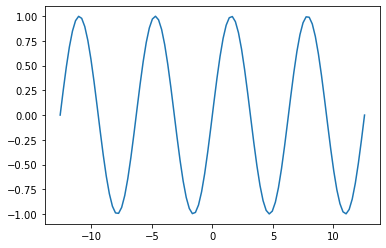

In [ ]:
import matplotlib.pyplot as plt # General import line.

# Lets consider some data
x = np.linspace(-4 * np.pi, 4 * np.pi, 100)
y = np.sin(x)
plt.plot(x, y)

Text(0.5, 1.0, 'A plot of $y = \\sin(x)$')

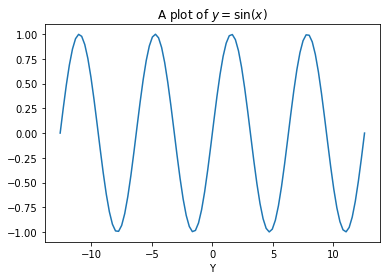

In [ ]:
plt.plot(x, y)
plt.xlabel("X")
plt.xlabel("Y")
plt.title("A plot of $y = \sin(x)$") # can even have latex here.

Text(0.5, 1.0, 'A plot of some trigonometric functions')

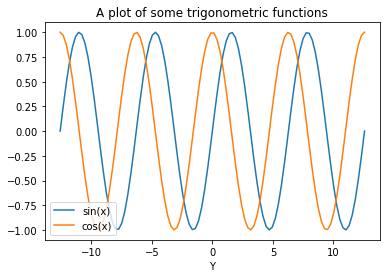

In [ ]:
plt.plot(x, np.sin(x), label='sin(x)')
plt.plot(x, np.cos(x), label='cos(x)')
plt.xlabel("X")
plt.xlabel("Y")
plt.legend(loc='lower left')
plt.title("A plot of some trigonometric functions")

### Plotting using Seaborn

In [ ]:
import seaborn as sns
sns.set_theme() # This makes the plots look pretty

<AxesSubplot:xlabel='x', ylabel='y'>

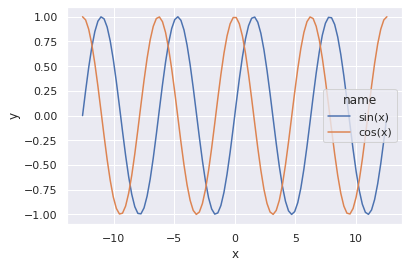

In [ ]:
data = {
    'x': np.concatenate([x, x]),
    'y': np.concatenate([np.sin(x), np.cos(x)]),
    'name': ['sin(x)'] * len(x) +  ['cos(x)'] * len(x)
}

sns.lineplot(data=data, x='x', y='y', hue='name')

You can also have multiple subplots in one figure, which can be very useful for some tasks.

axs.shape = (2,)


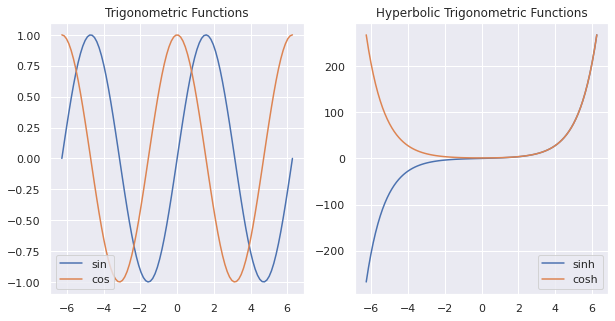

In [ ]:
# Subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5)) # nrows, ncols
# axs is a 2D array of matplotlib axis objects.
print('axs.shape =', axs.shape)

axs = axs.flatten() # flatten the axes into a 1D array

x = np.linspace(-2 * np.pi, 2 * np.pi, 100)
axs[0].plot(x, np.sin(x), label='sin')
axs[0].plot(x, np.cos(x), label='cos')
axs[0].set_title("Trigonometric Functions")

axs[1].plot(x, np.sinh(x), label='sinh')
axs[1].plot(x, np.cosh(x), label='cosh')
axs[1].set_title("Hyperbolic Trigonometric Functions")

axs[0].legend()
axs[1].legend()

Text(0.5, 1.0, 'plt.hist(y)')

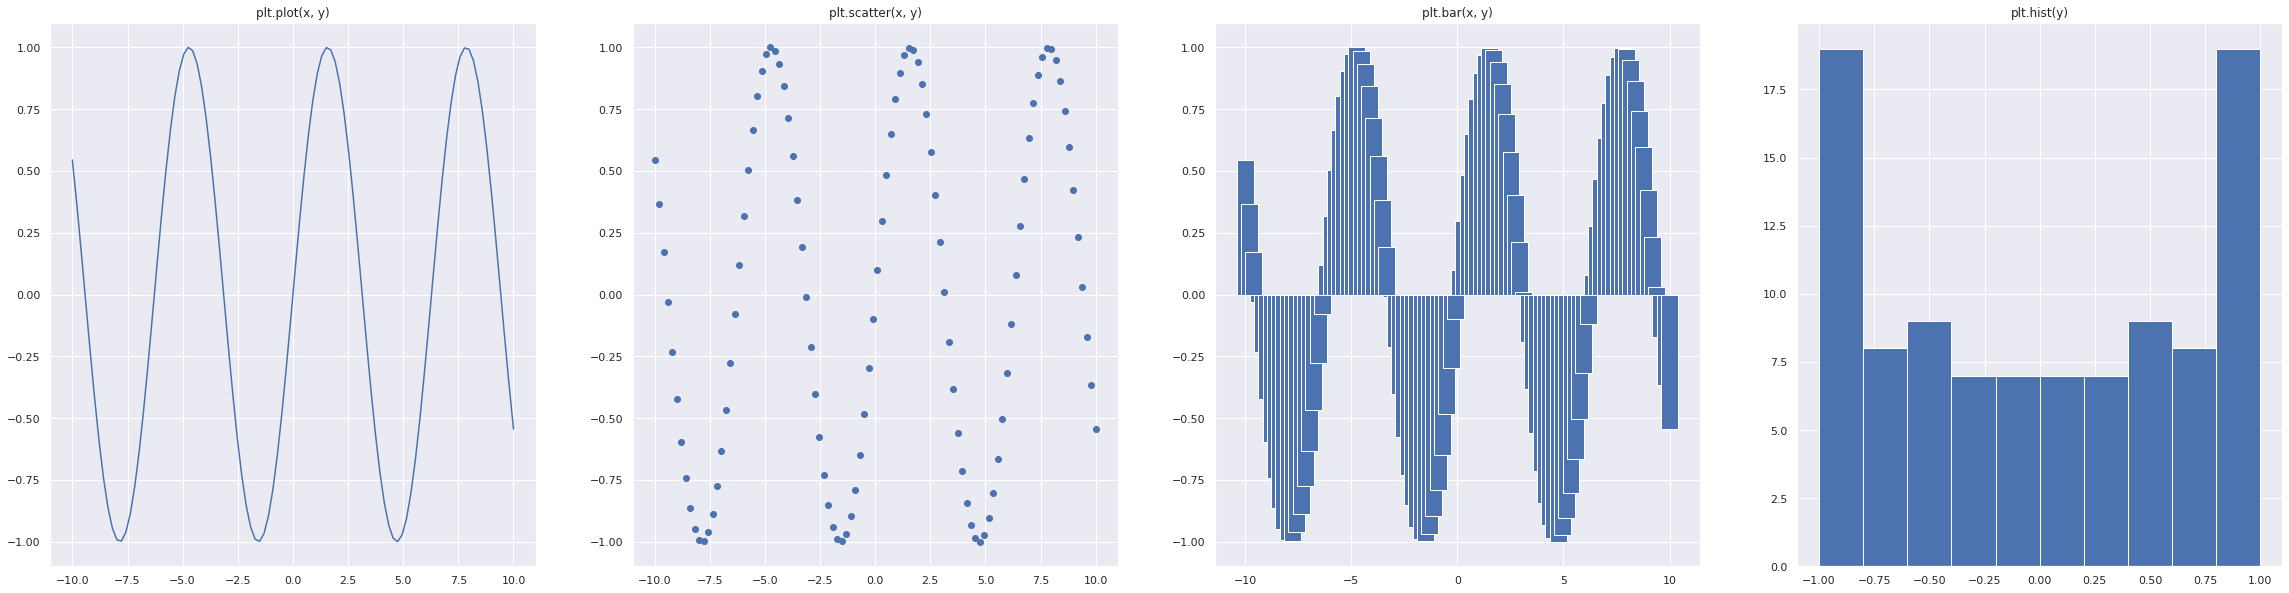

In [ ]:
# More examples
x = np.linspace(-10, 10, 100)
y = np.sin(x)
fig, axs = plt.subplots(1, 4, figsize=(40, 10))
axs = axs.ravel()

axs[0].plot(x, y)
axs[0].set_title("plt.plot(x, y)")

axs[1].scatter(x, y)
axs[1].set_title("plt.scatter(x, y)")

axs[2].bar(x, y)
axs[2].set_title("plt.bar(x, y)")

axs[3].hist(y)
axs[3].set_title("plt.hist(y)")

### Saving figures
If you are using these figures in other settings, then it is useful to be able to save them. Here, after creating a plot, you can use `plt.savefig(filename)` to save it. For instance:

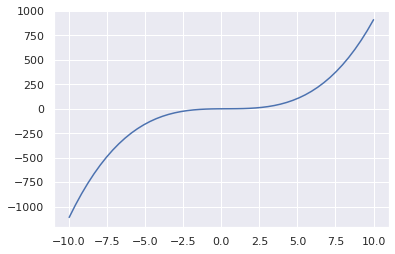

In [ ]:
x = np.linspace(-10, 10)
plt.plot(x, x ** 3 - x**2 + x - 1)
plt.savefig('myfigure1.png')
plt.savefig('myfigure2.png', bbox_inches='tight', pad_inches=0) # Remove the outside border
plt.savefig('myfigure3.png', bbox_inches='tight', pad_inches=0, dpi=400) # Make it higher resolution

## File I/O
Often we need to read and write external files using Python. We can do so using the `with` and `open` statements.
Generally, we do the following:


In [4]:
with open('myfile.txt', 'w+') as f:
    my_string = 'Hi there\nThis is a new line.'
    f.write(my_string)


In [2]:
# We can read it in a similar fashion:
with open('myfile.txt', 'r') as f:
    print("Read:", f.read())

Read: Hi there
This is a new line.


In [3]:
# Or use f.readlines to get a list of strings.
with open('myfile.txt', 'r') as f:
    print("Read:", f.readlines())

Read: ['Hi there\n', 'This is a new line.']


We use the `open` construct, where the first argument is the file name and the second is the mode for opening. Generally, the following are important:
- `r`: Open a file for reading
- `w`: Open it for writing. Note, this overwrites what is already there.
- `a`: Open it for appending, i.e. adding to what is already there.

If there is `+` after the mode (e.g. `w+`) will create the file if it does not exist.
If you use binary files, e.g. from `pickles` (which we do not cover here), the modes have an extra `b`, e.g. `rb`, `wb`.

## Custom Classes
We will now briefly cover custom *classes* and *objects* in Python. This is a way to associate data (e.g. variables) and behaviour (e.g. functions) for a specific entity we wish to represent.


We have already used classes before, e.g. a `numpy` array is an object. This contains data (the numbers) as well as behaviour (functions as `arr.sum()`, `arr.min()`, etc.).

Let's see how we define a class


In [7]:
import datetime
class Student: # Credit: Steven James and Devon Jarvis
    
    # Init method: This is called when the object is created
    def __init__(self, student_id, name, birth_year, year_of_study):
        
        # Here, `self` represents the current object, so this next line sets the ID of this object
        self.student_id = student_id
        self.name = name
        self.year_of_study = year_of_study
        self.birth_year = birth_year
    
    def calculate_age(self):
        today = datetime.datetime.now()
        year = today.year  # get today's year
        return year - self.birth_year
    
    
student = Student('123456', 'John Smith', 2000, 2) # This creates the object with the specific data
print("Age = ", student.calculate_age())          # This calculates the age
print("The Student ID of", student.name, "is", student.student_id)

Age =  24
The Student ID of John Smith is 123456


For the above, `self` should be an argument for each function. It can be used to access any of the class variables.
The `__init__` function gets called when we create the object.


In many cases, using a class can be the best way to solve a particular problem, especially when you have either of:
- Some code/behaviour that is closely tied to some data
- A clear notion of different entities in the system (e.g. `Student`, `Lecturer` or `Employee` and `Client`).

If you are interested in learning more, the following are good resources:
- https://docs.python.org/3/tutorial/classes.html
- https://realpython.com/python3-object-oriented-programming/


## Conclusion
In this lecture we covered the common Python libraries, `numpy`, `pandas`, `matplotlib` and `seaborn`.
- Numpy
  - How to create arrays and use them
- Pandas
  - How to manipulate data frames.
- Matplotlib and Seaborn
  - How to plot and visualise data


We also covered reading/writing files and creating custom classes.


There is a lot more information about these libraries, so feel free to explore this in more depth by reading their documentation.